<a href="https://colab.research.google.com/github/DakshDudeja/Tyre_Wear-Detection/blob/main/TyreWear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras import layers
from keras import models
import sys, os
import numpy as np
import pandas as pd

In [ ]:
train_dir="./train"
validation_dir="./val"
test_dir="./test"

train_new_dir="./train/new"
train_old_dir="./train/old"
train_inter_dir="./train/inter"

validation_new_dir="./val/new"
validation_old_dir="./val/old"
validation_inter_dir="./val/inter"

test_new_dir="./test/new"
test_old_dir="./test/old"
test_inter_dir="./test/inter"

(784, 424, 3)
(708, 600, 3)
(661, 645, 3)
(673, 631, 3)
(723, 577, 3)
(651, 604, 3)


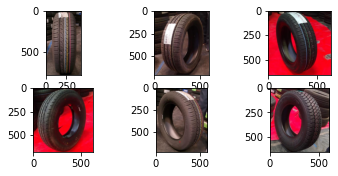

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
folder = train_new_dir
for i in range(6):
    pyplot.subplot(330 + 1 + i)
    i=i+1
    filename = folder + '/vn_'+'11' + str(i)  + '.jpg'
    image = imread(filename)
    pyplot.imshow(image)
    print(image.shape)
pyplot.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(600, 500),
        batch_size=20,
        class_mode='sparse')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(600, 500),
        batch_size=20,
        class_mode='sparse')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(600, 500),
        batch_size=20,
        class_mode='sparse')

Found 202 images belonging to 3 classes.
Found 148 images belonging to 3 classes.
Found 140 images belonging to 3 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(600, 500, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 598, 498, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 299, 249, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 297, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 123, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 121, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 60, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 58, 128)       7

In [ ]:
from keras import optimizers

model.compile(loss='sparse_categorical_crossentropy',
              optimizer= optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
history = model.fit(
      train_generator,
      steps_per_epoch = 10,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/5
10/10 [==============================] - 52s 5s/step - loss: 0.7839 - acc: 0.6703 - val_loss: 1.1093 - val_acc: 0.4700
Epoch 2/5
10/10 [==============================] - 58s 6s/step - loss: 0.6773 - acc: 0.7198 - val_loss: 1.1080 - val_acc: 0.4800
Epoch 3/5
10/10 [==============================] - 56s 6s/step - loss: 0.5596 - acc: 0.7418 - val_loss: 1.1002 - val_acc: 0.5000
Epoch 4/5
10/10 [==============================] - 49s 5s/step - loss: 0.6276 - acc: 0.7143 - val_loss: 1.3827 - val_acc: 0.4000
Epoch 5/5
10/10 [==============================] - 52s 5s/step - loss: 0.6258 - acc: 0.7198 - val_loss: 1.4264 - val_acc: 0.4000


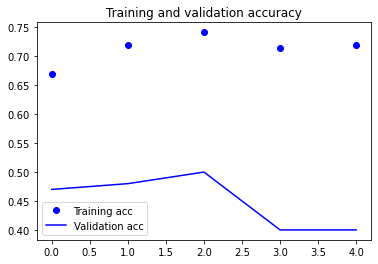

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.show()

In [ ]:
a = np.array(acc)
m = np.mean(a)
m

0.7131868124008178

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=5,
      epochs=5,
      validation_data=test_generator,
      validation_steps=5)

Epoch 1/5
5/5 [==============================] - 29s 7s/step - loss: 0.3736 - acc: 0.9024 - val_loss: 1.3735 - val_acc: 0.4300
Epoch 2/5
5/5 [==============================] - 32s 6s/step - loss: 0.4037 - acc: 0.8659 - val_loss: 1.7884 - val_acc: 0.3800
Epoch 3/5
5/5 [==============================] - 30s 7s/step - loss: 0.3876 - acc: 0.8415 - val_loss: 1.3480 - val_acc: 0.3900
Epoch 4/5
5/5 [==============================] - 27s 6s/step - loss: 0.3922 - acc: 0.8415 - val_loss: 1.3773 - val_acc: 0.4800
Epoch 5/5
5/5 [==============================] - 31s 7s/step - loss: 0.3603 - acc: 0.8900 - val_loss: 1.6308 - val_acc: 0.4200


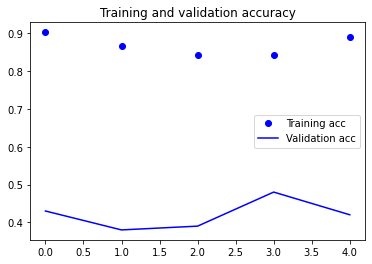

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.show()

In [ ]:
a = np.array(acc)
m = np.mean(a)
m

0.8682438850402832